In [2]:
import myfunc as mf

In [13]:
b = mf.myfunc(3,4)
id(b)

1833987328

In [10]:
a = eval('mf.myfunc(3,4)')
id(a)

1833987328

In [14]:
import re

In [50]:
str = "The rain in Spainxfjf falls mainly in the plain!"

#Check if the string contains "a" followed by exactly two "l" characters:
y = re.findall("nxx*", str)
x = re.findall("al{2}", str)

In [51]:
print(x);print(y)

['all']
['nx']


In [52]:
str = "The rain in Spain"

#Check if "ain" is present at the beginning of a WORD:

x = re.findall(r"\bain", str)

print(x)

[]


In [59]:
a = [1,2,3,4]
b = a
print(b)
b.append(9)

[1, 2, 3, 4]


In [60]:
b = [6,7]

In [61]:
print(a)

[1, 2, 3, 4, 9]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = [1,2,3,4,5,6,7,8]

In [5]:
a[1:]

[2, 3, 4, 5, 6, 7, 8]

In [7]:
a[:-1]

[1, 2, 3, 4, 5, 6, 7]

In [8]:
a[1:]

[2, 3, 4, 5, 6, 7, 8]

In [10]:
a[1:-1]

[2, 3, 4, 5, 6, 7]

In [11]:
a[::-1]

[8, 7, 6, 5, 4, 3, 2, 1]

In [12]:
a[:-1]

[1, 2, 3, 4, 5, 6, 7]

In [13]:
a[-2]

7

In [32]:
import datetime

In [4]:
x = datetime.datetime.now()

In [22]:
x.strftime("%S") == "57"

True

In [20]:
print(x)

2019-04-02 09:25:57.846534


In [5]:
import time


In [7]:
dta = pd.read_excel("USDBRL_PriceHist.xlsx", index_col=0)

In [27]:
time.strftime("%Y,%m,%d,%H,%M,%S")

'2019,04,02,09,47,48'

In [4]:
dta.index[0].hour

13

In [5]:
start_time = "2018/05/15"

In [37]:
start_time = datetime.datetime(2018, 5, 21)

In [20]:
end_time = datetime.datetime(2018, 5, 21, 13,1)

In [21]:
start_time<= end_time

True

In [36]:
Dates = dta.index

In [56]:
selected = dta[np.logical_and(Dates.month == start_time.month, Dates.day == start_time.day)]

In [52]:
a or b

[True, False]

In [43]:

def daily_data_selector(dta, dates, start_date):
    return dta[np.logical_and(dates.month == start_date.month, dates.day == start_date.day)]

def option_price(s, tau, sigma, k, r, q):
    d1 = (np.log(s/k) + (r - q + sigma**2/2)*tau)/(sigma*tau)
    d2 = d1 - sigma*np.sqrt(tau)
    return s*np.exp(-q*tau)*norm.cdf(d1) - k * np.exp(-r*tau)*norm.cdf(d2)


def delta(s, tau, sigma, k, r, q):
    d1 = (np.log(s/k) + (r - q + sigma**2/2)*tau)/(sigma*tau)
    return np.exp(-q*tau) * norm.cdf(d1)

def hedging_pnl(s, tau, sigma,k, r, q):

    optionPV = option_price(s[:-1],tau[:-1],k,sigma[:-1],r,q)
    repl_port = np.zeros((len(tau), ))
    total_port = np.zeros((len(tau), ))
    bankacc = np.zeros((len(tau), ))
    delta_vec = delta(s[:-1], tau[:-1], k, sigma[:-1], r, q)

    stock_pos = delta_vec[1:] * s[1:-1]
    stock_pos_diff = stock_pos - delta_vec[:-1] * s[1:-1]
    bankacc[0] = optionPV[0] - delta_vec[0]*s[0]
    repl_port[0] = optionPV[0]
    dt = np.diff(tau)

    for t in range(len(dt)-1):
        bankacc[t+1] = bankacc[t]*(1 + dt[t]*r) - stock_pos_diff[t] *(1-dt[t]*q)
        repl_port[t+1] = stock_pos[t] + bankacc[t+1]
        total_port[t+1] = optionPV[t+1] - repl_port[t+1] - bankacc[0]*(1 + r*dt[0])**tau[t+1]

    optionPV = np.append(optionPV, np.max(s[-1] - k, 0))
    bankacc[-1] = bankacc[-2]*(1+dt[-1]*r)
    repl_port[-1] = delta_vec[-1]*s[-1] + bankacc[-1]
    total_port[-1] = optionPV[-1] = repl_port[-1] - bankacc[0]* (1+ r*dt[0])**tau[-1]

    return optionPV, repl_port, total_port


In [30]:
def duration_data_selector(dta, duration):

    if duration == "1M":
        new_dta = dta[dta["1M Maturity"]>=0]
        return new_dta.index,new_dta["Close"].values, new_dta["1M Maturity"].values, new_dta["V1M"].values
    elif duration == "3M":
        new_dta = dta[dta["3M Maturity"]>=0]
        return new_dta.index,new_dta["Close"].values, new_dta["3M Maturity"].values, new_dta["V3M"].values
    elif duration == "1W":
        new_dta = dta[dta["1W Maturity"]>=0]
        return new_dta.index,new_dta["Close"].values, new_dta["1W Maturity"].values, new_dta["V1W"].values




In [34]:
Dates, s, tau, sigma = duration_data_selector(dta, "1M")
from scipy.stats import norm
s.shape

a = np.ones((2,))*2
s2 = s[0:2]
print(s2.shape)
print(a.shape)

a*s2

(2,)
(2,)


array([7.1614, 7.1664])

In [32]:
op, rep, total = hedging_pnl( s, tau, sigma, s[0],  0.065, 0.02)

In [186]:
d = delta(s, tau, sigma, s[0], 0.065, 0.02)
d[::-2]

C:\Users\canze\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


array([1.        , 0.99999989, 0.99999978, ..., 0.64152606, 0.63658864,
       0.68478663])

In [120]:
arr = dta2.T.values[0]

In [122]:
arr = arr[0:5]

In [123]:
arr2 = np.ones((5,1))

In [126]:
arr*arr2

array([[1.    , 3.5832, 3.5787, 3.5782, 3.5789],
       [1.    , 3.5832, 3.5787, 3.5782, 3.5789],
       [1.    , 3.5832, 3.5787, 3.5782, 3.5789],
       [1.    , 3.5832, 3.5787, 3.5782, 3.5789],
       [1.    , 3.5832, 3.5787, 3.5782, 3.5789]])

In [201]:
len(rep)

11320

In [202]:
a = np.array([1,2,3])

In [203]:
np.append(a, 4)

array([1, 2, 3, 4])

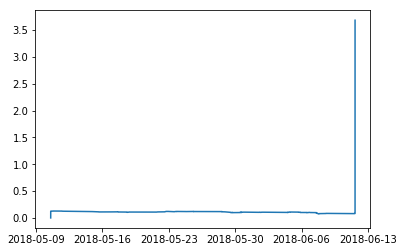

In [33]:
plt.plot(Dates,total)

In [62]:
def intra_day_volatility(dta, dates, start_date):
    new_dta = daily_data_selector(dta, dates, start_date)
    close_p = new_dta["Close"]
    print(close_p[1]/close_p[0]-1)
    return np.sqrt(252*8*60)*np.std(close_p[1:]/close_p[:-1]-1)
   

In [63]:
intra_day_volatility(dta, Dates, start_time)

0.001645979492714611


0.0

In [8]:
import numpy as np
import math

In [4]:
x = np.linspace(0, 2 * math.pi, 1000).reshape(-1, 1)


In [6]:
x.shape

(1000, 1)

In [2]:
a = np.array([])

In [3]:
np.append(a, 3)

array([3.])

In [4]:
a

array([], dtype=float64)

In [7]:
def try_args(*args):
    print(args)

    

In [8]:
try_args([1,2,3,4,5])

[1, 2, 3, 4, 5]


In [5]:
class base1:
    def __init__(self, x):
        self.x = x
        
    def sum_two(self):
        return self.x + self.y
    
class base2(base1):
    def __init__(self,x,y):
        super().__init__(x)
        self.y = y 
        
    def print_out(self):
        return self.sum_two()
        
        

In [7]:
b = base2(2,8)

In [8]:
b.print_out()

10

In [2]:
repl_port = np.array([])

In [5]:
repl_port = np.append( repl_port, 2)

In [6]:
repl_port

array([2.])

In [15]:
from scipy.stats import norm
def duration_data_selector(dta, duration):

    if duration == "1M":
        new_dta = dta[dta["1M Maturity"]>=0]
        return new_dta.index, new_dta["Close"].values, new_dta["1M Maturity"].values, new_dta["V1M"].values
    elif duration == "3M":
        new_dta = dta[dta["3M Maturity"]>=0]
        return new_dta.index, new_dta["Close"].values, new_dta["3M Maturity"].values, new_dta["V3M"].values
    elif duration == "1W":
        new_dta = dta[dta["1W Maturity"]>=0]
        return new_dta.index, new_dta["Close"].values, new_dta["1W Maturity"].values, new_dta["V1W"].values



def hedging_pnl(s, tau, sigma,k, r, q):

    optionPV = option_price(s[:-1],tau[:-1],k,sigma[:-1],r,q)
    repl_port = np.zeros((len(tau), 1))
    total_port = np.zeros((len(tau), 1))
    bankacc = np.zeros((len(tau), 1))
    delta_vec = delta(s[:-1], tau[:-1], k, sigma[:-1], r, q)

    stock_pos = delta_vec[1:] * s[1:-1]
    stock_pos_diff = stock_pos - delta_vec[:-1] * s[1:-1]
    bankacc[0] = optionPV[0] - delta_vec[0]*s[0]
    repl_port[0] = optionPV[0]
    dt = np.diff(tau)

    for t in range(len(dt)-1):
        bankacc[t+1] = bankacc[t]*(1 + dt[t]*r) - stock_pos_diff[t] *(1-dt[t]*q)
        repl_port[t+1] = stock_pos[t] + bankacc[t+1]
        total_port[t+1] = optionPV[t+1] - repl_port[t+1] - bankacc[0]*(1 + r*dt[0])**tau[t+1]

    optionPV = np.append(optionPV, np.max(s[-1] - k, 0))
    bankacc[-1] = bankacc[-2]*(1+dt[-1]*r)
    repl_port[-1] = delta_vec[-1]*s[-1] + bankacc[-1]
    total_port[-1] = optionPV[-1] - repl_port[-1] - bankacc[0]* (1+ r*dt[0])**tau[-1]

    return optionPV, repl_port, total_port


def option_price(s, tau, sigma, k, r, q):
    d1 = (np.log(s/k) + (r - q + sigma**2/2)*tau)/(sigma*tau)
    d2 = d1 - sigma*np.sqrt(tau)
    return s*np.exp(-q*tau)*norm.cdf(d1) - k * np.exp(-r*tau)*norm.cdf(d2)


def delta(s, tau, sigma, k, r, q):
    d1 = (np.log(s/k) + (r - q + sigma**2/2)*tau)/(sigma*tau)
    return np.exp(-q*tau) * norm.cdf(d1)



In [8]:
df = pd.read_excel("USDBRL_PriceHist.xlsx", index_col= 0)


In [16]:
dates, s, tau, sigma = duration_data_selector(df, "1M")
opPV, repPV, totalPV = hedging_pnl(s, tau, sigma, s[0], 0.065, 0.02)

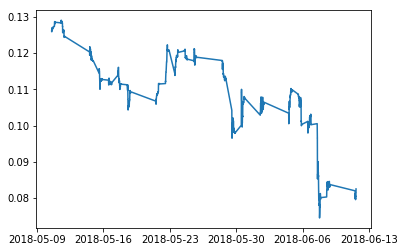

In [24]:
plt.plot(dates[1:-1], totalPV[1:-1])

In [38]:

def hedging_pnl_delta_band( s, tau, sigma, k, r, q, bound, func ):
    optionPV = option_price(s[:-1],tau[:-1],k,sigma[:-1],r,q)
    delta_vec = func(s[:-1], tau[:-1], k, sigma[:-1], r, q)

    repl_port = np.array([])
    total_port = np.array([])
    bankacc = np.array([])

    repl_port = np.append( repl_port, optionPV[0])
    total_port = np.append( total_port, 0)
    bankacc = np.append( bankacc, optionPV[0] - s[0]*delta_vec[0])
    delta_diff = np.diff(delta_vec)
    cumulate_delta = 0
    time_stamp = 0
    stock_index =  0
    dt = tau[1] - tau[0]

    for i, t in enumerate(tau[1:-1]):
        cumulate_delta += delta_diff[i]
        if cumulate_delta >= bound:
            stock_pos = (s[i+1]  - s[stock_index]) * cumulate_delta
            bankacc = np.append(bankacc, bankacc[-1]*(1 + (t-time_stamp)*r) - stock_pos*( 1- (t - time_stamp)*q))
            repl_port = np.append(repl_port, bankacc[-1] + delta_vec[i+1] * s[i+1] )
            total_port = np.append( total_port,  optionPV[i+1] - repl_port[-1] - bankacc[0] * ( 1 + dt*r)**t)
            cumulate_delta = 0
            time_stamp = t

    stock_pos = s[-1] - s[stock_index] * cumulate_delta
    optionPV = np.append(optionPV, np.max(s[-1] - k, 0))
    bankacc = np.append(bankacc, bankacc[-1]*(1 + (t-time_stamp)*r) - stock_pos*( 1- (t - time_stamp)*q))
    repl_port = np.append(repl_port, bankacc[-1] + delta_vec[-1] * s[-1] )
    total_port = np.append(total_port, optionPV[-1] - repl_port[-1] - bankacc[0] * ( 1 + dt*r)**tau[-1])


    return optionPV, repl_port, total_port


In [51]:
def vega(s, tau, sigma, k, r, q):
    d1 = (np.log(s/k) + (r - q + sigma**2/2)*tau)/(sigma*tau)
    return s*np.exp(-q*tau)*norm.pdf(d1)*np.sqrt(tau)



In [58]:
opPV, repPV, totalPV = hedging_pnl_delta_band(s, tau, sigma, s[0], 0.065, 0.02, 0.1, vega)

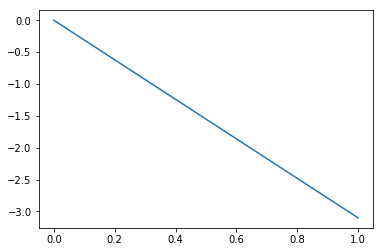

In [59]:
vega(s[:-1], tau[:-1], k, sigma[:-1], r, q)

In [4]:
base = datetime.datetime.today()
print(base)

2019-04-06 21:26:03.763105


In [7]:
print(base - datetime.timedelta(days=1))

2019-04-05 21:26:03.763105


In [14]:
df["3M Maturity"]

Dates
2018-05-10 13:01:00    0.250000
2018-05-10 13:02:00    0.249997
2018-05-10 13:03:00    0.249994
2018-05-10 13:04:00    0.249992
2018-05-10 13:05:00    0.249989
2018-05-10 13:06:00    0.249986
2018-05-10 13:07:00    0.249983
2018-05-10 13:08:00    0.249981
2018-05-10 13:09:00    0.249978
2018-05-10 13:10:00    0.249975
2018-05-10 13:11:00    0.249972
2018-05-10 13:13:00    0.249970
2018-05-10 13:14:00    0.249967
2018-05-10 13:15:00    0.249964
2018-05-10 13:16:00    0.249961
2018-05-10 13:17:00    0.249959
2018-05-10 13:18:00    0.249956
2018-05-10 13:19:00    0.249953
2018-05-10 13:20:00    0.249950
2018-05-10 13:21:00    0.249948
2018-05-10 13:22:00    0.249945
2018-05-10 13:23:00    0.249942
2018-05-10 13:24:00    0.249939
2018-05-10 13:25:00    0.249937
2018-05-10 13:26:00    0.249934
2018-05-10 13:27:00    0.249931
2018-05-10 13:28:00    0.249928
2018-05-10 13:29:00    0.249926
2018-05-10 13:30:00    0.249923
2018-05-10 13:31:00    0.249920
                         ...   
20

In [31]:
testing = pd.date_range(start = df[df["3M Maturity"].isna()].index[0].normalize(), end = df[df["3M Maturity"].isna()].index[-1].normalize())

In [45]:
df[df["3M Maturity"].isna()].index[0].normalize()-1

ValueError: Cannot add integral value to Timestamp without freq.

In [40]:
Dates = df.index

In [48]:
Dates.normalize().unique()

DatetimeIndex(['2018-05-10', '2018-05-11', '2018-05-14', '2018-05-15',
               '2018-05-16', '2018-05-17', '2018-05-18', '2018-05-21',
               '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25',
               '2018-05-28', '2018-05-29', '2018-05-30', '2018-06-01',
               '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07',
               '2018-06-08', '2018-06-11', '2018-06-12', '2018-06-13',
               '2018-06-14', '2018-06-15', '2018-06-18', '2018-06-19',
               '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-25',
               '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
               '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-16', '2018-07-17',
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-23',
               '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27',
      